<a href="https://colab.research.google.com/github/Sanjay1802/Machine-Learning/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip uninstall -y numpy                              # Uninstall the current version of Numpy
!pip install numpy==1.26.4                           # Install numpy version 1.26.4
!pip install scikit-surprise --prefer-binary         # Install surprise library now

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.36.3 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; pyt

In [19]:
import pandas as pd
# Dont import numpy now because we have already installed numpy verision 1.26.4
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Drive mounnt
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')   # Once your colab is connected to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/combinedNetflixData.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [3]:
# Reading dataset file having 2 crore 40 lakh 58 thousand records

netflix_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/combinedNetflixData.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [5]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [6]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


# Finding the movie count by assumiung that if there is NaN in Rating column so in front of it , there is a movie id

In [7]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

# Finding the total unqiue customer id by substracting the movie count from uniuque values in cust id column

In [8]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [9]:
customer_count

475257

In [10]:
customer_count - movie_count  # Total number of customers that we have after removing movie id from the column

470758

In [11]:
#get the total number of ratings given by the customers to all movies combined

rating_count=netflix_dataset['Cust_Id'].count()-movie_count  # In Customer id column we will remove movie id to get how many total rating are there
rating_count

24053764

In [12]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [17]:
stars


,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


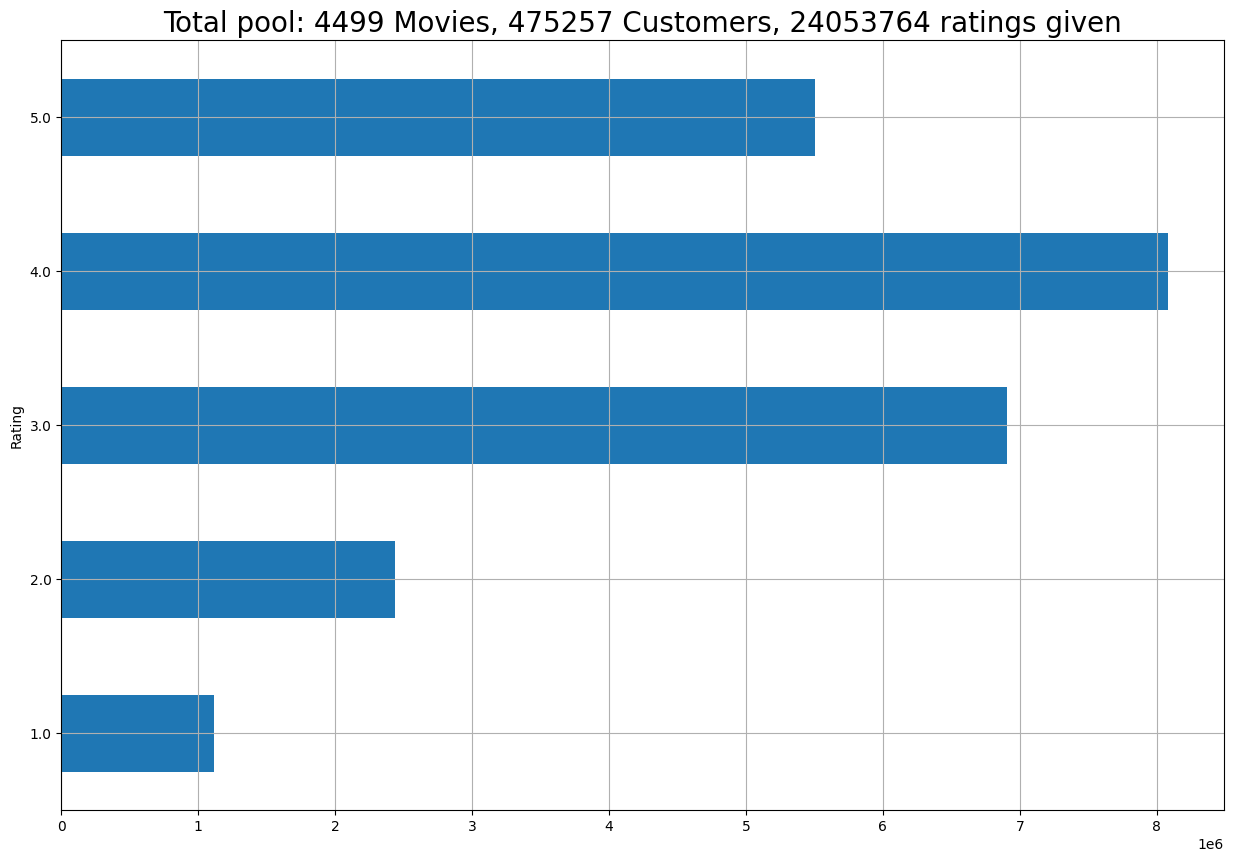

In [20]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))

plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [21]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [22]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None
movie_np =[]
# Iterate over the DataFrame rows
for cust_id in netflix_dataset['Cust_Id']:
    if ':' in cust_id:
      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [23]:
movie_np  # Movie id columns that we can add in our dataset

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [24]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np

In [25]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [26]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# to keep only the rows where the 'Rating' column is not null (i.e., it excludes rows where the 'Rating' is NaN)

In [27]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [28]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [29]:
# Now we dont hav movie if in cust id column we have removed all 1:Nan , 2:Nan so lets fix the data type now
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

/tmp/ipython-input-280181150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [30]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [31]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [32]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [33]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [34]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list  # In this lst all movies are there those are having less rating then bencmarsk so reove them

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [35]:
len(drop_movie_list)

2699

In [36]:
4499-2699  #movies left

1800

In [37]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [38]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [39]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [40]:
len(drop_cust_list)

282042

#Lets remove all movies that has been rated less than 908 times
# Lets remove all customers that have rated less than 36 movies

In [41]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [42]:
netflix_dataset  # Clean netflix data !!!!!!!!

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [43]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19695836 entries, 696 to 24056846
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 601.1 MB


# Model Building

In [66]:
df_title = pd.read_csv("/content/drive/MyDrive/Dataset/NetflixMovieData.csv",   encoding='latin',header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

In [67]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [68]:
# Install numpy
!pip install surprise

In [69]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [70]:
reader=Reader()

In [71]:
#we only work with top 100K rows for quick runtime
data=  Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [72]:
model=SVD()  # Creating a SVD model

In [73]:
cross_validate(model, data, measures=['RMSE'], cv=3)  # Trained the model

{'test_rmse': array([1.02238863, 1.01744004, 1.0142516 ]),
 'fit_time': (1.6814115047454834, 2.828277111053467, 3.984659433364868),
 'test_time': (0.728879451751709, 1.527489185333252, 0.38568949699401855)}


# Use model for making Recommendation for a specific user

In [74]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [75]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [76]:
# Filter the dataset for the specific user you have selected to make recokmnedation to that user
user_ratings = netflix_dataset[netflix_dataset['Cust_Id'] == 1331154]
user_ratings

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [77]:
# Find the number of unique movies rated by the user
movies_rated_by_user = user_ratings['Movie_Id'].nunique()

print(f"User 1331154 has rated {movies_rated_by_user} unique movies.")

User 1331154 has rated 253 unique movies.


In [78]:
copy_data_for_user = df_title.copy()   #making a copy for each individual customer for the recomendation
copy_data_for_user

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [79]:
CLEAN_copy_data_for_user = copy_data_for_user[~copy_data_for_user['Movie_Id'].isin(drop_movie_list)]
CLEAN_copy_data_for_user   # Removing the movie les then benchmark for this user

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [80]:
CLEAN_copy_data_for_user['Estimate_Score']=CLEAN_copy_data_for_user['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# predict the score (rating) that a user (with user ID 1331154) might give to a list of movies.

/tmp/ipython-input-1091736127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLEAN_copy_data_for_user['Estimate_Score']=CLEAN_copy_data_for_user['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [81]:
CLEAN_copy_data_for_user

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.873630
4,5,2004.0,The Rise and Fall of ECW,4.197938
5,6,1997.0,Sick,3.224471
7,8,2004.0,What the #$*! Do We Know!?,3.364805
15,16,1996.0,Screamers,2.886037
...,...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.538047
17765,17767,2004.0,Fidel Castro: American Experience,3.538047
17766,17768,2000.0,Epoch,3.538047
17767,17769,2003.0,The Company,3.538047


In [82]:
CLEAN_copy_data_for_user.sort_values('Estimate_Score', ascending=False) # Descending order estimated score

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.197938
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.155014
29,30,2003.0,Something's Gotta Give,4.127402
2,3,1997.0,Character,3.873630
17,18,1994.0,Immortal Beloved,3.630509
...,...,...,...,...
5,6,1997.0,Sick,3.224471
16,17,2005.0,7 Seconds,3.166745
25,26,2004.0,Never Die Alone,3.139434
23,24,1981.0,My Bloody Valentine,2.895040


In [83]:
top5_movies=CLEAN_copy_data_for_user.sort_values('Estimate_Score', ascending=False).head(5)

In [84]:
top5_movies

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.197938
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.155014
29,30,2003.0,Something's Gotta Give,4.127402
2,3,1997.0,Character,3.873630
17,18,1994.0,Immortal Beloved,3.630509
